In [66]:
import pandas as pd
import numpy as ny 
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
#import and read mortgage delinquencies 'CountyMortgagesPercent-90plus-DaysLate-thru-2020-09'
df = pd.read_csv("/Users/georgestevenson/Desktop/vs_code_ds4a/Mortgage Delinquency/CountyMortgagesPercent-90-plusDaysLate-thru-2020-09.csv")
df 

RegionType State               Name FIPSCode  2008-01  2008-02  2008-03  \
0     National   NaN      United States    -----      1.5      1.6      1.6   
1       County    AL     Baldwin County  '01003'      1.3      1.2      1.1   
2       County    AL   Jefferson County  '01073'      2.1      1.9      1.9   
3       County    AL         Lee County  '01081'      1.4      1.1      1.2   
4       County    AL     Madison County  '01089'      0.8      0.9      1.1   
..         ...   ...                ...      ...      ...      ...      ...   
467     County    WI      Racine County  '55101'      0.9      1.1      0.7   
468     County    WI        Rock County  '55105'      0.8      1.0      0.8   
469     County    WI  Washington County  '55131'      0.7      0.8      0.8   
470     County    WI    Waukesha County  '55133'      0.6      0.6      0.6   
471     County    WI   Winnebago County  '55139'      1.1      0.7      0.8   

     2008-04  2008-05  2008-06  ...  2019-12  2020-01  2020-02  2020-03  \
0        1.5      1.6      1.7  ...      0.8      0.9      0.8      0.8   
1        1.3      1.5      1.6  ...      0.6      0.6      0.6      0.6   
2        2.0      2.0      1.9  ...      1.3      1.3      1.3      1.3   
3        1.6      1.2      1.5  ...      0.5      0.6      0.4      0.6   
4        1.0      1.1      0.8  ...      0.6      0.7      0.8      0.6   
..       ...      ...      ...  ...      ...      ...      ...      ...   
467      1.1      1.2      1.3  ...      0.5      0.5      0.5      0.5   
468      0.6      0.6      0.8  ...      0.7      0.8      0.9      1.1   
469      0.8      0.7      0.5  ...      0.3      0.4      0.4      0.4   
470      0.6      0.6      0.7  ...      0.3      0.4      0.4      0.3   
471      1.0      0.9      0.8  ...      0.5      0.7      0.7      0.4   

     2020-04  2020-05  2020-06  2020-07  2020-08  2020-09  
0        0.7      0.7      0.6      0.6      0.6      0.6  
1        0.6      0.4      0.4      0.4      0.5      0.5  
2        1.0      0.9      0.8      0.7      0.8      0.8  
3        0.6      0.9      0.7      0.6      0.5      0.7  
4        0.4      0.5      0.6      0.5      0.5      0.6  
..       ...      ...      ...      ...      ...      ...  
467      0.4      0.5      0.4      0.5      0.5      0.4  
468      0.9      1.2      0.8      1.0      1.0      0.7  
469      0.4      0.2      0.2      0.3      0.5      0.4  
470      0.2      0.2      0.2      0.2      0.2      0.2  
471      0.4      0.6      0.6      0.7      0.6      0.5  

[472 rows x 157 columns]

In [ ]:
#see the entire dataset
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #print(df_chi_zip)

In [58]:
#Focus on Illinois Counties
df_i = df.loc[df['State'] == 'IL'] 

df_i.head(5)

RegionType State              Name FIPSCode  2008-01  2008-02  2008-03  \
129     County    IL  Champaign County  '17019'      0.7      0.8      0.8   
130     County    IL       Cook County  '17031'      1.8      1.8      1.8   
131     County    IL     DuPage County  '17043'      0.8      0.8      0.8   
132     County    IL       Kane County  '17089'      1.4      1.4      1.5   
133     County    IL    Kendall County  '17093'      1.2      1.3      1.2   

     2008-04  2008-05  2008-06  ...  2019-12  2020-01  2020-02  2020-03  \
129      0.9      0.8      0.8  ...      0.9      0.9      0.8      0.7   
130      1.8      1.9      1.9  ...      1.2      1.2      1.1      1.1   
131      0.8      0.9      1.0  ...      0.6      0.6      0.6      0.5   
132      1.4      1.3      1.4  ...      0.7      0.9      0.8      0.8   
133      1.4      1.4      1.2  ...      0.9      0.6      0.8      0.7   

     2020-04  2020-05  2020-06  2020-07  2020-08  2020-09  
129      0.7      0.8      0.7      0.7      0.6      0.6  
130      0.9      0.9      0.8      0.9      0.9      0.9  
131      0.6      0.5      0.5      0.5      0.5      0.4  
132      0.6      0.5      0.6      0.6      0.6      0.6  
133      0.5      0.6      0.5      0.4      0.4      0.3  

[5 rows x 157 columns]

In [59]:
#add a new column with the avg delinquencies by year 2008
df_i['2008 90 Day Del'] = ((df_i['2008-01'] + df_i['2008-02'] + df_i['2008-03'] + df_i['2008-04'] + df_i['2008-05'] + df_i['2008-06'] + df_i['2008-07'] + df_i['2008-08'] + df_i['2008-09'] + df_i['2008-10'] + df_i['2008-11'] + df_i['2008-12']) / 12)

#add a new column with the avg delinquencies by year 2009
df_i['2009 90 Day Del'] = ((df_i['2009-01'] + df_i['2009-02'] + df_i['2009-03'] + df_i['2009-04'] + df_i['2009-05'] + df_i['2009-06'] + df_i['2009-07'] + df_i['2009-08'] + df_i['2009-09'] + df_i['2009-10'] + df_i['2009-11'] + df_i['2009-12']) / 12)

#add a new column with the avg delinquencies by year 2010
df_i['2010 90 Day Del'] = ((df_i['2010-01'] + df_i['2010-02'] + df_i['2010-03'] + df_i['2010-04'] + df_i['2010-05'] + df_i['2010-06'] + df_i['2010-07'] + df_i['2010-08'] + df_i['2010-09'] + df_i['2010-10'] + df_i['2010-11'] + df_i['2010-12']) / 12)

#add a new column with the avg delinquencies by year 2011
df_i['2011 90 Day Del'] = ((df_i['2011-01'] + df_i['2011-02'] + df_i['2011-03'] + df_i['2011-04'] + df_i['2011-05'] + df_i['2011-06'] + df_i['2011-07'] + df_i['2010-08'] + df_i['2011-09'] + df_i['2011-10'] + df_i['2011-11'] + df_i['2011-12']) / 12)

#add a new column with the avg delinquencies by year 2012
df_i['2012 90 Day Del'] = ((df_i['2012-01'] + df_i['2012-02'] + df_i['2012-03'] + df_i['2012-04'] + df_i['2012-05'] + df_i['2012-06'] + df_i['2012-07'] + df_i['2012-08'] + df_i['2012-09'] + df_i['2012-10'] + df_i['2012-11'] + df_i['2012-12']) / 12)

#add a new column with the avg delinquencies by year 2013
df_i['2013 90 Day Del'] = ((df_i['2013-01'] + df_i['2013-02'] + df_i['2013-03'] + df_i['2013-04'] + df_i['2013-05'] + df_i['2013-06'] + df_i['2013-07'] + df_i['2013-08'] + df_i['2013-09'] + df_i['2013-10'] + df_i['2013-11'] + df_i['2013-12']) / 12)

#add a new column with the avg delinquencies by year 2014
df_i['2014 90 Day Del'] = ((df_i['2014-01'] + df_i['2014-02'] + df_i['2014-03'] + df_i['2014-04'] + df_i['2014-05'] + df_i['2014-06'] + df_i['2014-07'] + df_i['2014-08'] + df_i['2014-09'] + df_i['2014-10'] + df_i['2014-11'] + df_i['2014-12']) / 12)

#add a new column with the avg delinquencies by year 2015
df_i['2015 90 Day Del'] = ((df_i['2015-01'] + df_i['2015-02'] + df_i['2015-03'] + df_i['2015-04'] + df_i['2015-05'] + df_i['2015-06'] + df_i['2015-07'] + df_i['2015-08'] + df_i['2015-09'] + df_i['2015-10'] + df_i['2015-11'] + df_i['2015-12']) / 12)

#add a new column with the avg delinquencies by year 2016
df_i['2016 90 Day Del'] = ((df_i['2016-01'] + df_i['2016-02'] + df_i['2016-03'] + df_i['2016-04'] + df_i['2016-05'] + df_i['2016-06'] + df_i['2016-07'] + df_i['2016-08'] + df_i['2016-09'] + df_i['2016-10'] + df_i['2016-11'] + df_i['2016-12']) / 12)

#add a new column with the avg delinquencies by year 2017
df_i['2017 90 Day Del'] = ((df_i['2017-01'] + df_i['2017-02'] + df_i['2017-03'] + df_i['2017-04'] + df_i['2017-05'] + df_i['2017-06'] + df_i['2017-07'] + df_i['2017-08'] + df_i['2017-09'] + df_i['2017-10'] + df_i['2017-11'] + df_i['2017-12']) / 12)

#add a new column with the avg delinquencies by year 2018
df_i['2018 90 Day Del'] = ((df_i['2018-01'] + df_i['2018-02'] + df_i['2018-03'] + df_i['2018-04'] + df_i['2018-05'] + df_i['2018-06'] + df_i['2018-07'] + df_i['2018-08'] + df_i['2018-09'] + df_i['2018-10'] + df_i['2018-11'] + df_i['2018-12']) / 12)

#add a new column with the avg delinquencies by year 2019
df_i['2019 90 Day Del'] = ((df_i['2019-01'] + df_i['2019-02'] + df_i['2019-03'] + df_i['2019-04'] + df_i['2019-05'] + df_i['2019-06'] + df_i['2019-07'] + df_i['2019-08'] + df_i['2019-09'] + df_i['2019-10'] + df_i['2019-11'] + df_i['2019-12']) / 12)

#add a new column with the avg delinquencies by year 2020
df_i['2020 90 Day Del'] = ((df_i['2020-01'] + df_i['2020-02'] + df_i['2020-03'] + df_i['2020-04'] + df_i['2020-05'] + df_i['2020-06'] + df_i['2020-07'] + df_i['2020-08'] + df_i['2020-09']) / 9)


df_i.head()

<ipython-input-59-26066335879c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['2008 90 Day Del'] = ((df_i['2008-01'] + df_i['2008-02'] + df_i['2008-03'] + df_i['2008-04'] + df_i['2008-05'] + df_i['2008-06'] + df_i['2008-07'] + df_i['2008-08'] + df_i['2008-09'] + df_i['2008-10'] + df_i['2008-11'] + df_i['2008-12']) / 12)
<ipython-input-59-26066335879c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['2009 90 Day Del'] = ((df_i['2009-01'] + df_i['2009-02'] + df_i['2009-03'] + df_i['2009-04'] + d

RegionType State              Name FIPSCode  2008-01  2008-02  2008-03  \
129     County    IL  Champaign County  '17019'      0.7      0.8      0.8   
130     County    IL       Cook County  '17031'      1.8      1.8      1.8   
131     County    IL     DuPage County  '17043'      0.8      0.8      0.8   
132     County    IL       Kane County  '17089'      1.4      1.4      1.5   
133     County    IL    Kendall County  '17093'      1.2      1.3      1.2   

     2008-04  2008-05  2008-06  ...  2011 90 Day Del  2012 90 Day Del  \
129      0.9      0.8      0.8  ...         1.425000         1.783333   
130      1.8      1.9      1.9  ...         5.975000         5.791667   
131      0.8      0.9      1.0  ...         3.316667         3.016667   
132      1.4      1.3      1.4  ...         4.850000         4.566667   
133      1.4      1.4      1.2  ...         4.516667         4.341667   

     2013 90 Day Del  2014 90 Day Del  2015 90 Day Del  2016 90 Day Del  \
129         1.075000         1.141667         0.883333         0.516667   
130         4.525000         3.341667         2.691667         2.041667   
131         2.366667         1.650000         1.316667         1.016667   
132         3.416667         2.316667         1.700000         1.291667   
133         3.891667         2.891667         2.483333         1.875000   

     2017 90 Day Del  2018 90 Day Del  2019 90 Day Del  2020 90 Day Del  
129         0.725000         0.775000         0.683333         0.722222  
130         1.633333         1.275000         1.100000         0.966667  
131         0.750000         0.716667         0.550000         0.522222  
132         1.100000         0.775000         0.700000         0.666667  
133         1.591667         1.308333         0.750000         0.533333  

[5 rows x 170 columns]

In [60]:
#save df_i to a new df name
df_m_90_plus = df_i

In [63]:
#drop monthly results
df_m_90_plus.drop(df_m_90_plus.iloc[:, 4:157], inplace = True, axis = 1)
df_m_90_plus

/Users/georgestevenson/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


RegionType State                Name FIPSCode  2008 90 Day Del  \
129     County    IL    Champaign County  '17019'         0.850000   
130     County    IL         Cook County  '17031'         2.216667   
131     County    IL       DuPage County  '17043'         1.100000   
132     County    IL         Kane County  '17089'         1.666667   
133     County    IL      Kendall County  '17093'         1.558333   
134     County    IL         Lake County  '17097'         1.316667   
135     County    IL      McHenry County  '17111'         1.183333   
136     County    IL       McLean County  '17113'         0.941667   
137     County    IL      Madison County  '17119'         1.691667   
138     County    IL       Peoria County  '17143'         1.183333   
139     County    IL  Rock Island County  '17161'         0.866667   
140     County    IL    St. Clair County  '17163'         1.675000   
141     County    IL     Sangamon County  '17167'         0.733333   
142     County    IL     Tazewell County  '17179'         0.941667   
143     County    IL         Will County  '17197'         1.775000   
144     County    IL    Winnebago County  '17201'         1.858333   

     2009 90 Day Del  2010 90 Day Del  2011 90 Day Del  2012 90 Day Del  \
129         1.616667         1.383333         1.425000         1.783333   
130         5.200000         6.558333         5.975000         5.791667   
131         2.808333         3.791667         3.316667         3.016667   
132         4.475000         5.533333         4.850000         4.566667   
133         4.441667         5.250000         4.516667         4.341667   
134         3.291667         4.291667         3.858333         3.600000   
135         3.216667         4.083333         3.775000         4.250000   
136         1.816667         1.600000         1.491667         1.341667   
137         2.691667         3.058333         2.683333         2.616667   
138         1.783333         1.966667         2.158333         2.383333   
139         2.083333         1.883333         2.425000         2.583333   
140         3.075000         3.875000         3.641667         3.216667   
141         1.275000         1.466667         1.600000         1.675000   
142         1.850000         2.241667         2.241667         2.050000   
143         4.091667         4.983333         4.533333         4.408333   
144         3.525000         4.258333         4.416667         4.133333   

     2013 90 Day Del  2014 90 Day Del  2015 90 Day Del  2016 90 Day Del  \
129         1.075000         1.141667         0.883333         0.516667   
130         4.525000         3.341667         2.691667         2.041667   
131         2.366667         1.650000         1.316667         1.016667   
132         3.416667         2.316667         1.700000         1.291667   
133         3.891667         2.891667         2.483333         1.875000   
134         2.850000         2.175000         1.841667         1.466667   
135         2.958333         2.216667         1.866667         1.650000   
136         1.250000         1.291667         1.133333         0.958333   
137         2.391667         2.075000         1.658333         1.700000   
138         2.050000         1.658333         1.283333         1.158333   
139         1.958333         1.825000         1.533333         1.333333   
140         2.650000         2.241667         2.166667         1.816667   
141         1.283333         0.950000         0.966667         1.125000   
142         1.775000         1.725000         1.450000         1.158333   
143         3.366667         2.708333         2.133333         1.633333   
144         3.283333         2.625000         1.858333         1.708333   

     2017 90 Day Del  2018 90 Day Del  2019 90 Day Del  2020 90 Day Del  
129         0.725000         0.775000         0.683333         0.722222  
130         1.633333         1.275000         1.100000         0.966667  
131         0.750000         0.716667  

In [38]:
#pivot the table
#pd.pivot_table(df_m_3090,index=["Name"])

In [43]:
#switch rows and columns
#df_tr = df_m_3090.transpose()
#df_tr

In [64]:
#filter down to chicago specific counties
df_m_90_plus
value_list = ['Cook County', 'DuPage County', 'Kane County', 'Lake County', 'McHenry County', 'Will County']
boolean_series = df_m_90_plus.Name.isin(value_list)
df_chicago_county_90_plus_delin = df_m_90_plus[boolean_series]

df_chicago_county_90_plus_delin

RegionType State            Name FIPSCode  2008 90 Day Del  \
130     County    IL     Cook County  '17031'         2.216667   
131     County    IL   DuPage County  '17043'         1.100000   
132     County    IL     Kane County  '17089'         1.666667   
134     County    IL     Lake County  '17097'         1.316667   
135     County    IL  McHenry County  '17111'         1.183333   
143     County    IL     Will County  '17197'         1.775000   

     2009 90 Day Del  2010 90 Day Del  2011 90 Day Del  2012 90 Day Del  \
130         5.200000         6.558333         5.975000         5.791667   
131         2.808333         3.791667         3.316667         3.016667   
132         4.475000         5.533333         4.850000         4.566667   
134         3.291667         4.291667         3.858333         3.600000   
135         3.216667         4.083333         3.775000         4.250000   
143         4.091667         4.983333         4.533333         4.408333   

     2013 90 Day Del  2014 90 Day Del  2015 90 Day Del  2016 90 Day Del  \
130         4.525000         3.341667         2.691667         2.041667   
131         2.366667         1.650000         1.316667         1.016667   
132         3.416667         2.316667         1.700000         1.291667   
134         2.850000         2.175000         1.841667         1.466667   
135         2.958333         2.216667         1.866667         1.650000   
143         3.366667         2.708333         2.133333         1.633333   

     2017 90 Day Del  2018 90 Day Del  2019 90 Day Del  2020 90 Day Del  
130         1.633333         1.275000         1.100000         0.966667  
131         0.750000         0.716667         0.550000         0.522222  
132         1.100000         0.775000         0.700000         0.666667  
134         1.116667         0.816667         0.791667         0.811111  
135         1.183333         0.850000         0.816667         0.811111  
143         1.366667         1.283333         1.133333         1.055556

In [65]:
#write df df_chicago_county_3090_delin to desktop
df_chicago_county_90_plus_delin.to_csv('df_chicago_county_90_plus_delin_2008_2020.csv')

In [68]:
#import and read mortgage delinquencies 'df_chicago_county_90_plus_delin_2008_2020.csv'
df90 = pd.read_csv("/Users/georgestevenson/Desktop/df_chicago_county_90_plus_delin_2008_2020.csv")
df90

Unnamed: 0 RegionType State            Name FIPSCode  2008 90 Day Del  \
0         130     County    IL     Cook County  '17031'         2.216667   
1         131     County    IL   DuPage County  '17043'         1.100000   
2         132     County    IL     Kane County  '17089'         1.666667   
3         134     County    IL     Lake County  '17097'         1.316667   
4         135     County    IL  McHenry County  '17111'         1.183333   
5         143     County    IL     Will County  '17197'         1.775000   

   2009 90 Day Del  2010 90 Day Del  2011 90 Day Del  2012 90 Day Del  \
0         5.200000         6.558333         5.975000         5.791667   
1         2.808333         3.791667         3.316667         3.016667   
2         4.475000         5.533333         4.850000         4.566667   
3         3.291667         4.291667         3.858333         3.600000   
4         3.216667         4.083333         3.775000         4.250000   
5         4.091667         4.983333         4.533333         4.408333   

   2013 90 Day Del  2014 90 Day Del  2015 90 Day Del  2016 90 Day Del  \
0         4.525000         3.341667         2.691667         2.041667   
1         2.366667         1.650000         1.316667         1.016667   
2         3.416667         2.316667         1.700000         1.291667   
3         2.850000         2.175000         1.841667         1.466667   
4         2.958333         2.216667         1.866667         1.650000   
5         3.366667         2.708333         2.133333         1.633333   

   2017 90 Day Del  2018 90 Day Del  2019 90 Day Del  2020 90 Day Del  
0         1.633333         1.275000         1.100000         0.966667  
1         0.750000         0.716667         0.550000         0.522222  
2         1.100000         0.775000         0.700000         0.666667  
3         1.116667         0.816667         0.791667         0.811111  
4         1.183333         0.850000         0.816667         0.811111  
5         1.366667         1.283333         1.133333         1.055556

In [72]:
print(df90.columns)

Index(['Unnamed: 0', 'RegionType', 'State', 'Name', 'FIPSCode',
       '2008 90 Day Del', '2009 90 Day Del', '2010 90 Day Del',
       '2011 90 Day Del', '2012 90 Day Del', '2013 90 Day Del',
       '2014 90 Day Del', '2015 90 Day Del', '2016 90 Day Del',
       '2017 90 Day Del', '2018 90 Day Del', '2019 90 Day Del',
       '2020 90 Day Del'],
      dtype='object')


In [92]:
# initialise data of lists.
data = {'year':['2008 90 Day Del', '2009 90 Day Del', '2010 90 Day Del',
       '2011 90 Day Del', '2012 90 Day Del', '2013 90 Day Del',
       '2014 90 Day Del', '2015 90 Day Del', '2016 90 Day Del',
       '2017 90 Day Del', '2018 90 Day Del', '2019 90 Day Del',
       '2020 90 Day Del'],

        'cook county':['2.216667', '5.200000', '6.558333', '5.975000', '5.791667', '4.525000', '3.341667', '2.691667', '2.041667', '1.633333', '1.275000', '1.100000', '0.966667'],

        'dupage county':['1.100000', '2.808333', '3.791667', '3.316667', '3.016667', '2.366667', '1.650000', '1.316667', '1.016667','0.750000', '0.716667', '0.550000', '0.522222'],

        'kane county':['1.666667', '4.475000', '5.533333', '4.850000', '4.566667', '3.416667', '2.316667', '1.700000', '1.291667', '1.100000', '0.775000', '0.700000', '0.666667'],

        'lake county':['1.316667', '3.291667', '4.291667', '3.858333', '3.600000', '2.850000', '2.175000', '1.841667', '1.466667', '1.116667', '0.816667', '0.791667', '0.811111'],

        'mchenry county':['1.183333', '3.216667', '4.083333', '3.775000', '4.250000', '2.958333', '2.216667', '1.866667', '1.650000', '1.183333', '0.850000', '0.816667', '0.811111'],

        'will county':['1.775000', '4.091667', '4.983333', '4.533333', '4.408333', '3.366667', '2.708333', '2.133333', '1.633333', '1.366667', '1.283333', '1.133333', '1.055556']}
 
# Create DataFrame
dfa = pd.DataFrame(data)
 
# Print the output.
dfa

year cook county dupage county kane county lake county  \
0   2008 90 Day Del    2.216667      1.100000    1.666667    1.316667   
1   2009 90 Day Del    5.200000      2.808333    4.475000    3.291667   
2   2010 90 Day Del    6.558333      3.791667    5.533333    4.291667   
3   2011 90 Day Del    5.975000      3.316667    4.850000    3.858333   
4   2012 90 Day Del    5.791667      3.016667    4.566667    3.600000   
5   2013 90 Day Del    4.525000      2.366667    3.416667    2.850000   
6   2014 90 Day Del    3.341667      1.650000    2.316667    2.175000   
7   2015 90 Day Del    2.691667      1.316667    1.700000    1.841667   
8   2016 90 Day Del    2.041667      1.016667    1.291667    1.466667   
9   2017 90 Day Del    1.633333      0.750000    1.100000    1.116667   
10  2018 90 Day Del    1.275000      0.716667    0.775000    0.816667   
11  2019 90 Day Del    1.100000      0.550000    0.700000    0.791667   
12  2020 90 Day Del    0.966667      0.522222    0.666667    0.811111   

   mchenry county will county  
0        1.183333    1.775000  
1        3.216667    4.091667  
2        4.083333    4.983333  
3        3.775000    4.533333  
4        4.250000    4.408333  
5        2.958333    3.366667  
6        2.216667    2.708333  
7        1.866667    2.133333  
8        1.650000    1.633333  
9        1.183333    1.366667  
10       0.850000    1.283333  
11       0.816667    1.133333  
12       0.811111    1.055556

In [93]:
#change column names
dfa.rename(columns={'cook county': 'cook county 90 Day Delin', 'dupage county': 'dupage county 90 Day Delin', 'kane county': 'kane county 90 Day Delin', 'lake county': 'lake county 90 Day Delin', 'mchenry county': 'mchenry county 90 Day Delin', 'will county': 'will county 90 Day Delin'}, inplace=True)
dfa

year cook county 90 Day Delin dupage county 90 Day Delin  \
0   2008 90 Day Del                 2.216667                   1.100000   
1   2009 90 Day Del                 5.200000                   2.808333   
2   2010 90 Day Del                 6.558333                   3.791667   
3   2011 90 Day Del                 5.975000                   3.316667   
4   2012 90 Day Del                 5.791667                   3.016667   
5   2013 90 Day Del                 4.525000                   2.366667   
6   2014 90 Day Del                 3.341667                   1.650000   
7   2015 90 Day Del                 2.691667                   1.316667   
8   2016 90 Day Del                 2.041667                   1.016667   
9   2017 90 Day Del                 1.633333                   0.750000   
10  2018 90 Day Del                 1.275000                   0.716667   
11  2019 90 Day Del                 1.100000                   0.550000   
12  2020 90 Day Del                 0.966667                   0.522222   

   kane county 90 Day Delin lake county 90 Day Delin  \
0                  1.666667                 1.316667   
1                  4.475000                 3.291667   
2                  5.533333                 4.291667   
3                  4.850000                 3.858333   
4                  4.566667                 3.600000   
5                  3.416667                 2.850000   
6                  2.316667                 2.175000   
7                  1.700000                 1.841667   
8                  1.291667                 1.466667   
9                  1.100000                 1.116667   
10                 0.775000                 0.816667   
11                 0.700000                 0.791667   
12                 0.666667                 0.811111   

   mchenry county 90 Day Delin will county 90 Day Delin  
0                     1.183333                 1.775000  
1                     3.216667                 4.091667  
2                     4.083333                 4.983333  
3                     3.775000                 4.533333  
4                     4.250000                 4.408333  
5                     2.958333                 3.366667  
6                     2.216667                 2.708333  
7                     1.866667                 2.133333  
8                     1.650000                 1.633333  
9                     1.183333                 1.366667  
10                    0.850000                 1.283333  
11                    0.816667                 1.133333  
12                    0.811111                 1.055556

In [98]:
#convert year column to just year
dfa['year'] = [x[:-11] for x in dfa['year']]
dfa

year cook county 90 Day Delin dupage county 90 Day Delin  \
0   2008                 2.216667                   1.100000   
1   2009                 5.200000                   2.808333   
2   2010                 6.558333                   3.791667   
3   2011                 5.975000                   3.316667   
4   2012                 5.791667                   3.016667   
5   2013                 4.525000                   2.366667   
6   2014                 3.341667                   1.650000   
7   2015                 2.691667                   1.316667   
8   2016                 2.041667                   1.016667   
9   2017                 1.633333                   0.750000   
10  2018                 1.275000                   0.716667   
11  2019                 1.100000                   0.550000   
12  2020                 0.966667                   0.522222   

   kane county 90 Day Delin lake county 90 Day Delin  \
0                  1.666667                 1.316667   
1                  4.475000                 3.291667   
2                  5.533333                 4.291667   
3                  4.850000                 3.858333   
4                  4.566667                 3.600000   
5                  3.416667                 2.850000   
6                  2.316667                 2.175000   
7                  1.700000                 1.841667   
8                  1.291667                 1.466667   
9                  1.100000                 1.116667   
10                 0.775000                 0.816667   
11                 0.700000                 0.791667   
12                 0.666667                 0.811111   

   mchenry county 90 Day Delin will county 90 Day Delin  
0                     1.183333                 1.775000  
1                     3.216667                 4.091667  
2                     4.083333                 4.983333  
3                     3.775000                 4.533333  
4                     4.250000                 4.408333  
5                     2.958333                 3.366667  
6                     2.216667                 2.708333  
7                     1.866667                 2.133333  
8                     1.650000                 1.633333  
9                     1.183333                 1.366667  
10                    0.850000                 1.283333  
11                    0.816667                 1.133333  
12                    0.811111                 1.055556

In [109]:
#convert data type
dfa['year'] = dfa['year'].astype(str).astype(int)
dfa
#dfa['cook county 90 Day Delin'] = dfa['cook county 90 Day Delin'].astype(int)
#dfa.astype(float).astype(int)

year cook county 90 Day Delin dupage county 90 Day Delin  \
0   2008                 2.216667                   1.100000   
1   2009                 5.200000                   2.808333   
2   2010                 6.558333                   3.791667   
3   2011                 5.975000                   3.316667   
4   2012                 5.791667                   3.016667   
5   2013                 4.525000                   2.366667   
6   2014                 3.341667                   1.650000   
7   2015                 2.691667                   1.316667   
8   2016                 2.041667                   1.016667   
9   2017                 1.633333                   0.750000   
10  2018                 1.275000                   0.716667   
11  2019                 1.100000                   0.550000   
12  2020                 0.966667                   0.522222   

   kane county 90 Day Delin lake county 90 Day Delin  \
0                  1.666667                 1.316667   
1                  4.475000                 3.291667   
2                  5.533333                 4.291667   
3                  4.850000                 3.858333   
4                  4.566667                 3.600000   
5                  3.416667                 2.850000   
6                  2.316667                 2.175000   
7                  1.700000                 1.841667   
8                  1.291667                 1.466667   
9                  1.100000                 1.116667   
10                 0.775000                 0.816667   
11                 0.700000                 0.791667   
12                 0.666667                 0.811111   

   mchenry county 90 Day Delin will county 90 Day Delin  
0                     1.183333                 1.775000  
1                     3.216667                 4.091667  
2                     4.083333                 4.983333  
3                     3.775000                 4.533333  
4                     4.250000                 4.408333  
5                     2.958333                 3.366667  
6                     2.216667                 2.708333  
7                     1.866667                 2.133333  
8                     1.650000                 1.633333  
9                     1.183333                 1.366667  
10                    0.850000                 1.283333  
11                    0.816667                 1.133333  
12                    0.811111                 1.055556

In [110]:
dfa.dtypes

year                            int64
cook county 90 Day Delin       object
dupage county 90 Day Delin     object
kane county 90 Day Delin       object
lake county 90 Day Delin       object
mchenry county 90 Day Delin    object
will county 90 Day Delin       object
dtype: object

In [115]:
#convert data to usable numbers to graph
dfa['cook county 90 Day Delin'] = pd.to_numeric(dfa['cook county 90 Day Delin'])
dfa['dupage county 90 Day Delin'] = pd.to_numeric(dfa['dupage county 90 Day Delin'])
dfa['kane county 90 Day Delin'] = pd.to_numeric(dfa['kane county 90 Day Delin'])
dfa['lake county 90 Day Delin'] = pd.to_numeric(dfa['lake county 90 Day Delin'])
dfa['mchenry county 90 Day Delin'] = pd.to_numeric(dfa['mchenry county 90 Day Delin'])
dfa['will county 90 Day Delin'] = pd.to_numeric(dfa['will county 90 Day Delin'])

In [137]:
#write df dfa to desktop
dfa.to_csv('dfa_chicago_county_90_plus_delin_2008_2020_to_merge.csv')

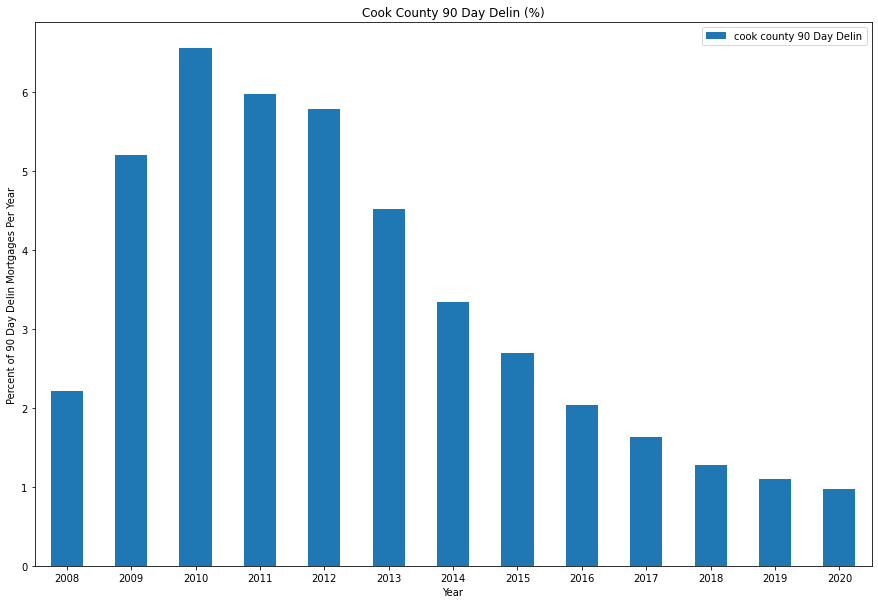

In [117]:
#Bar plot for Cook County 90 Day Delin from 2008 - 2020
dfa.plot.bar(x ='year', y='cook county 90 Day Delin', rot=0, figsize=(15, 10))
 
# Add title and axis names
plt.title('Cook County 90 Day Delin (%)')
plt.xlabel('Year')
plt.ylabel('Percent of 90 Day Delin Mortgages Per Year')

 
# Show graph
plt.show()

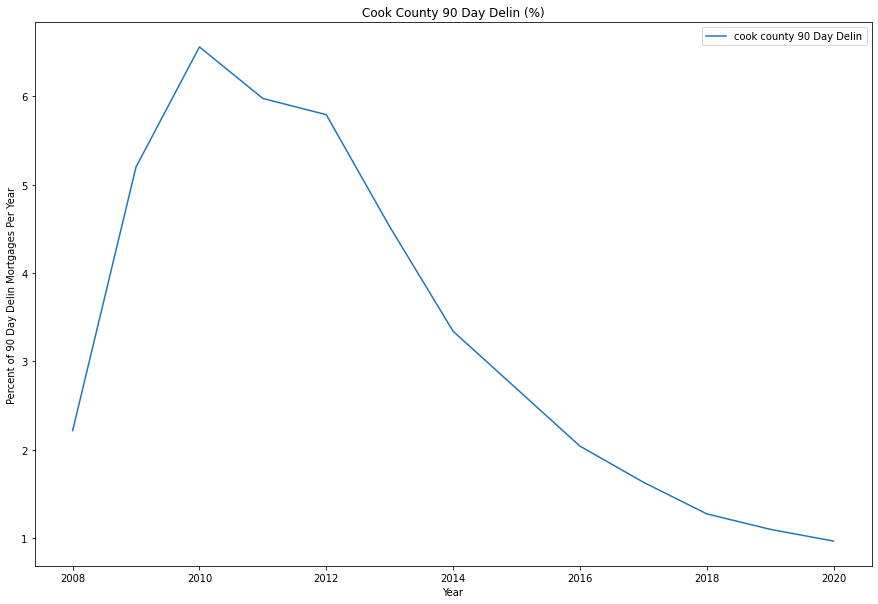

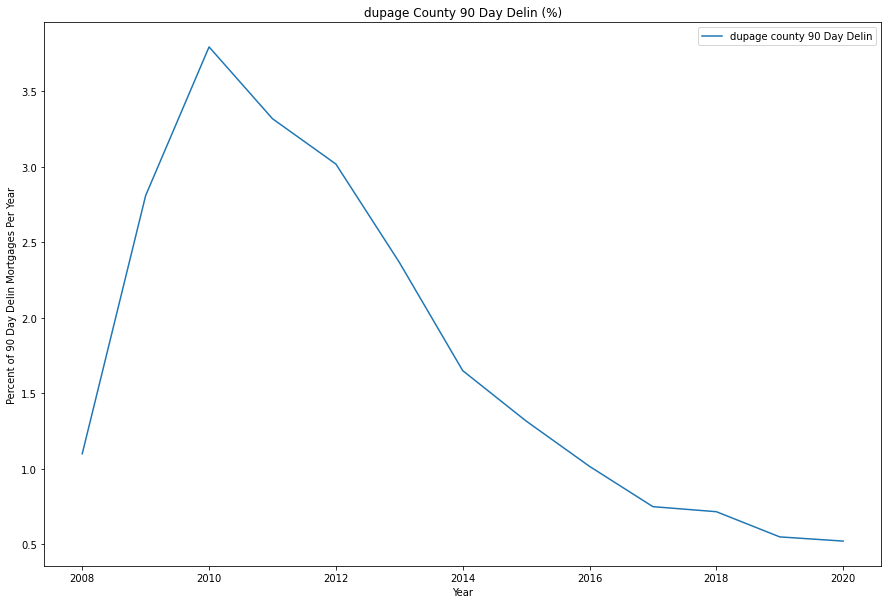

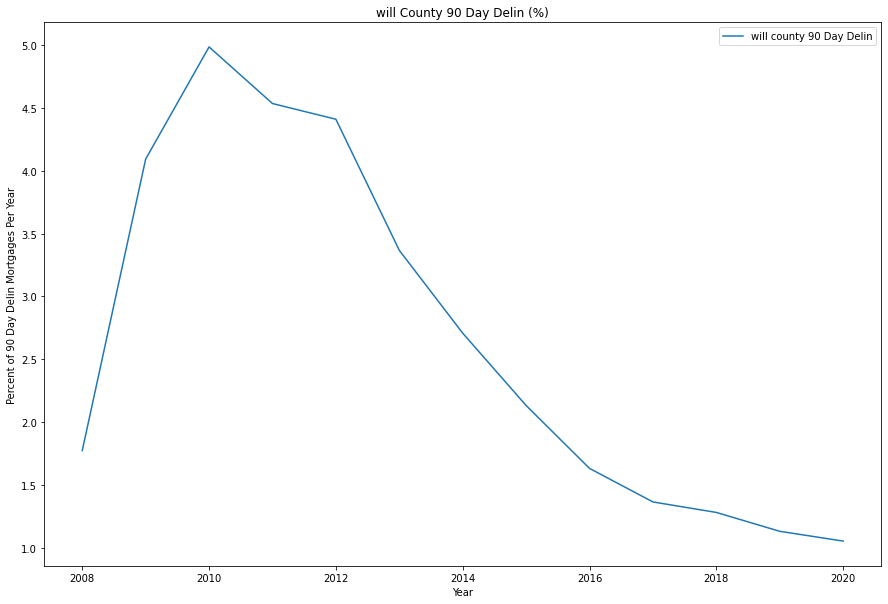

In [127]:
#line plot for Cook County 90 Day Delin from 2008 - 2020
dfa.plot(x ='year', y='cook county 90 Day Delin', rot=0, figsize=(15, 10))
 
# Add title and axis names
plt.title('Cook County 90 Day Delin (%)')
plt.xlabel('Year')
plt.ylabel('Percent of 90 Day Delin Mortgages Per Year')

 
# Show graph
plt.show()

#Bar plot for dupage County 90 Day Delin from 2008 - 2020
dfa.plot(x ='year', y='dupage county 90 Day Delin', rot=0, figsize=(15, 10))
 
# Add title and axis names
plt.title('dupage County 90 Day Delin (%)')
plt.xlabel('Year')
plt.ylabel('Percent of 90 Day Delin Mortgages Per Year')

 
# Show graph
plt.show()

#Bar plot for kane County 90 Day Delin from 2008 - 2020
dfa.plot(x ='year', y='kane county 90 Day Delin', rot=0, figsize=(15, 10))
 
# Add title and axis names
plt.title('kane County 90 Day Delin (%)')
plt.xlabel('Year')
plt.ylabel('Percent of 90 Day Delin Mortgages Per Year')

 
# Show graph
plt.show()

#Bar plot for lake County 90 Day Delin from 2008 - 2020
dfa.plot(x ='year', y='lake county 90 Day Delin', rot=0, figsize=(15, 10))
 
# Add title and axis names
plt.title('lake County 90 Day Delin (%)')
plt.xlabel('Year')
plt.ylabel('Percent of 90 Day Delin Mortgages Per Year')

 
# Show graph
plt.show()

#Bar plot for mchenry County 90 Day Delin from 2008 - 2020
dfa.plot(x ='year', y='mchenry county 90 Day Delin', rot=0, figsize=(15, 10))
 
# Add title and axis names
plt.title('mchenry County 90 Day Delin (%)')
plt.xlabel('Year')
plt.ylabel('Percent of 90 Day Delin Mortgages Per Year')

 
# Show graph
plt.show()

#Bar plot for will County 90 Day Delin from 2008 - 2020
dfa.plot(x ='year', y='will county 90 Day Delin', rot=0, figsize=(15, 10))
 
# Add title and axis names
plt.title('will County 90 Day Delin (%)')
plt.xlabel('Year')
plt.ylabel('Percent of 90 Day Delin Mortgages Per Year')

 
# Show graph
plt.show()


In [136]:
#save graphs to pdf
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('County Line Graphs for 90plus Day Delin 2008 to 2020.pdf') as pdf:

    dfa.plot(x ='year', y='cook county 90 Day Delin', rot=0, figsize=(15, 10))
    plt.title('Cook County 90 Day Delin (%)')
    plt.xlabel('Year')
    plt.ylabel('Percent of 90 Day Delin Mortgages Per Year')
    pdf.savefig()
    plt.close()

    dfa.plot(x ='year', y='dupage county 90 Day Delin', rot=0, figsize=(15, 10))
    plt.title('dupage County 90 Day Delin (%)')
    plt.xlabel('Year')
    plt.ylabel('Percent of 90 Day Delin Mortgages Per Year')
    pdf.savefig()
    plt.close()

    dfa.plot(x ='year', y='kane county 90 Day Delin', rot=0, figsize=(15, 10))
    plt.title('kane County 90 Day Delin (%)')
    plt.xlabel('Year')
    plt.ylabel('Percent of 90 Day Delin Mortgages Per Year')
    pdf.savefig()
    plt.close()

    dfa.plot(x ='year', y='lake county 90 Day Delin', rot=0, figsize=(15, 10))
    plt.title('lake County 90 Day Delin (%)')
    plt.xlabel('Year')
    plt.ylabel('Percent of 90 Day Delin Mortgages Per Year')
    pdf.savefig()
    plt.close()

    dfa.plot(x ='year', y='mchenry county 90 Day Delin', rot=0, figsize=(15, 10))
    plt.title('mchenry County 90 Day Delin (%)')
    plt.xlabel('Year')
    plt.ylabel('Percent of 90 Day Delin Mortgages Per Year')
    pdf.savefig()
    plt.close()

    dfa.plot(x ='year', y='will county 90 Day Delin', rot=0, figsize=(15, 10))
    plt.title('will County 90 Day Delin (%)')
    plt.xlabel('Year')
    plt.ylabel('Percent of 90 Day Delin Mortgages Per Year')
    pdf.savefig()
    plt.close()